# 26. Autoencoders
---

1. Denoising
2. Image Reconstruction
3. Image Generation
4. Data Compression & Decompression
---

PhD(e). MsC. Ing. Jonnatan Arias Garcia

Jonnatan.arias@utp.edu.co

jariasg@uniquindio.edu.co

**Imports**

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

## Data del mnist



In [19]:
(x_train, _), (x_test, _) = mnist.load_data()

# Data Normalization
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape data
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

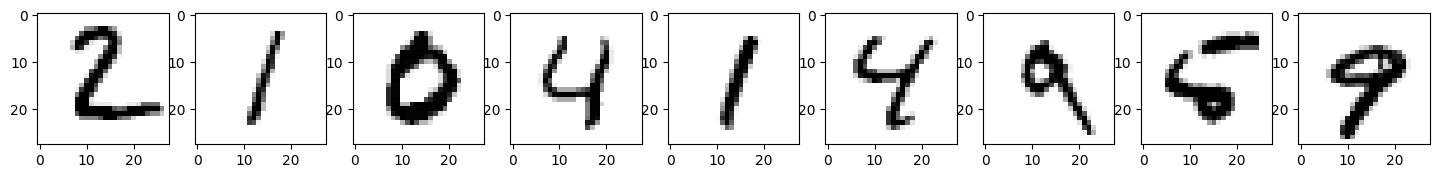

In [20]:
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test[i].reshape(28, 28), cmap="binary")
plt.show()

Geremos el ruido normal sobre las imagenes

In [4]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

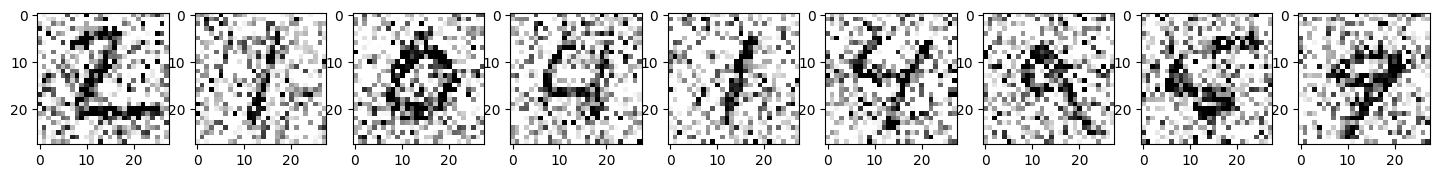

In [5]:
# Displaying images with noise
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
plt.show()

## modelo del AE

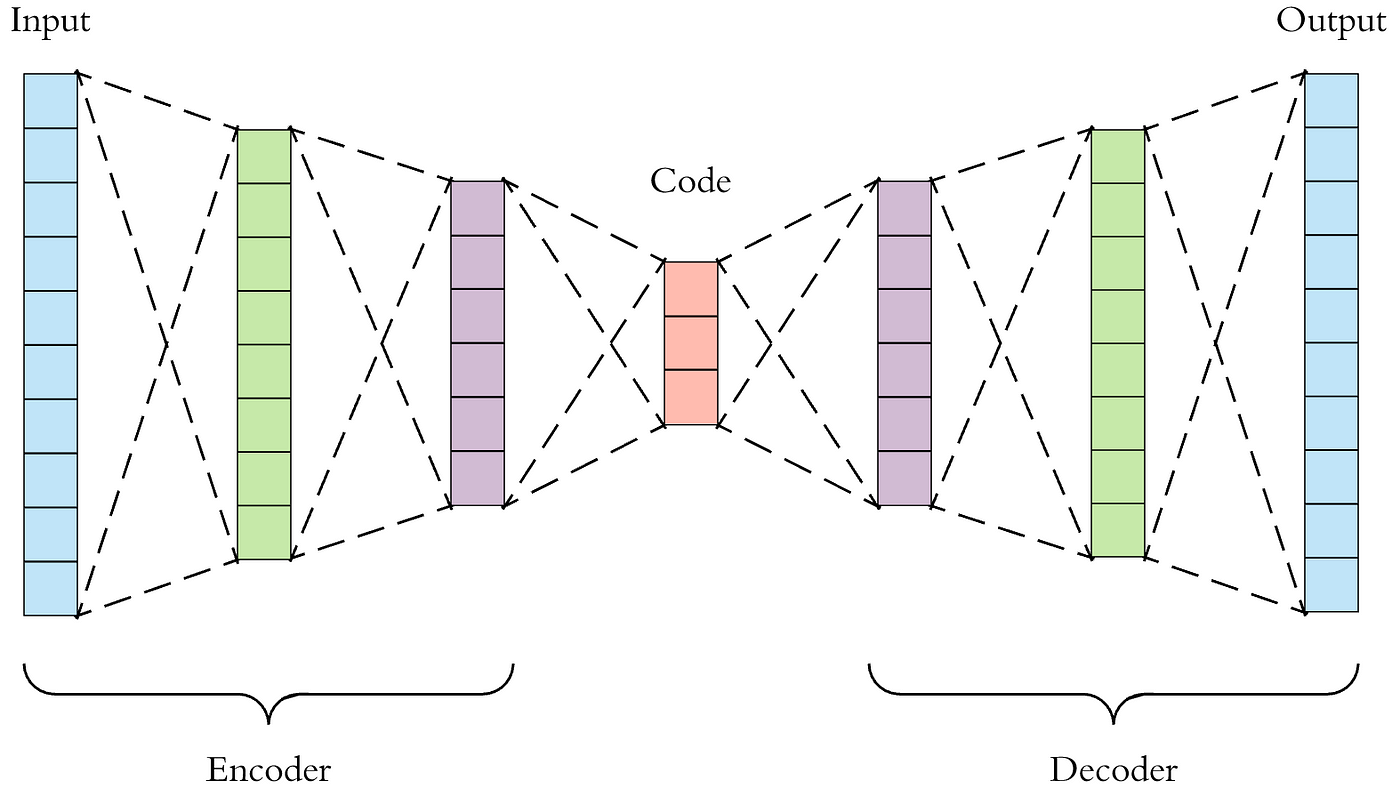

In [6]:
model = Sequential()
# Encoder
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

# Decoder
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(UpSampling2D((2, 2)))

model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

# Compile
model.compile(optimizer='adam', loss='mean_squared_error')

# Get model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         2312      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 8)           0

## Train

Queremos que recorra el AE para reconocer caracteristicas de ruidosa y aprenda caracteristicas (img.no ruidosa).

el encoder genera el espacio latente con entradas ruidosas a un espacio de caracteristicas sin ruido.
posteriormente el decoder esxtrar las caracteristicas y genera la imagen sin ruido.


In [10]:
model.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True,
          validation_data=(x_test_noisy, x_test))

Epoch 1/10
235/235 [==============================] - 10s 15ms/step - loss: 0.0562 - val_loss: 0.0429
Epoch 2/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0386 - val_loss: 0.0349
Epoch 3/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0338 - val_loss: 0.0325
Epoch 4/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0315 - val_loss: 0.0303
Epoch 5/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0297 - val_loss: 0.0286
Epoch 6/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0284 - val_loss: 0.0276
Epoch 7/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0273 - val_loss: 0.0266
Epoch 8/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0265 - val_loss: 0.0258
Epoch 9/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0258 - val_loss: 0.0256
Epoch 10/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0250 - val_los

## Evaluation

In [11]:
model.evaluate(x_test_noisy, x_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0242


0.02424638904631138

## Prediction

313/313 [==============================] - 1s 3ms/step


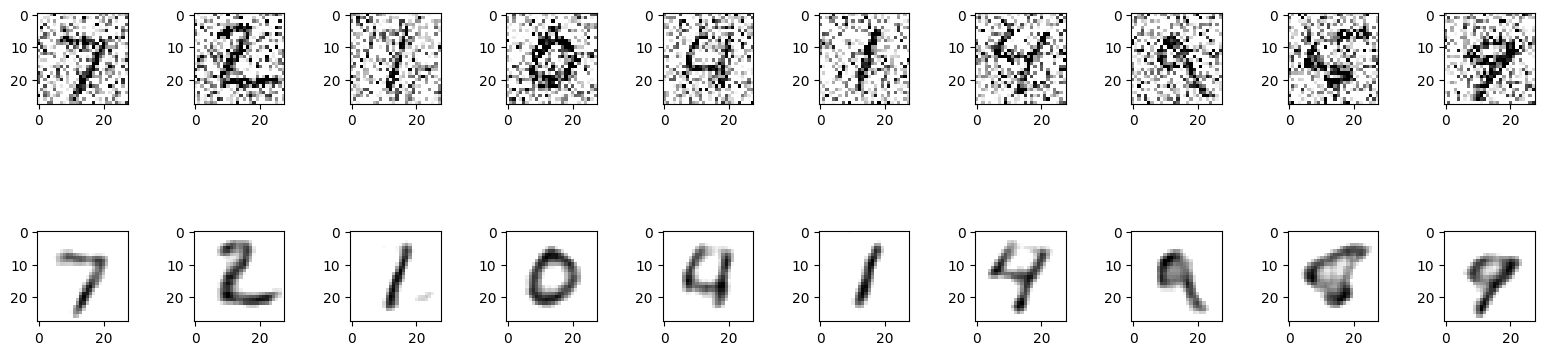

In [12]:
no_noise_img = model.predict(x_test_noisy)

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")

    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(no_noise_img[i].reshape(28, 28), cmap="binary")

plt.show()

# A tener en cuenta

* La parte de codificador nos lleva toda la entrada a un espacio latente de características que transforma (X_train a X_latent)
* La parte del decodificador, transforma (X_latent a Y_train)

* Podemos usar tanto la parte latente para codificar cualquier X de entrada en X_latent
* Podemos usar cualquier X_latent para generar Y_train

---
* Denoising e Image Reconstruction, son similares: entrenamos datos con ruido o error X_train y la etiqueta de salida debe ser los datos sin ruido Y_train. El modelo aprendera a mapear de uno a otro sacando caracteristicas principales en el espacio latente intermedio, por ende el ruido o error deberia filtrarse en la reconstruccion.
* Compresión y descompresión de datos: es similar al anterior solo que para comprimir solo se usa el codificador, para descomprimir el decodificador.
* Para Image Generation debemos entrenar el modelo para que se aprendan imágenes según una etiqueta dada, eso lo llevará a un espacio latente (con al codificador).
  * Al enviarle una etiqueta y usando el decodificador, podemos extraer/generar nuevas imágenes desde el espacio latente, imágenes ligadas a la etiqueta.